In [30]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.utils import shuffle

import cv2


import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage

from sklearn.preprocessing import StandardScaler
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization,concatenate
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers

from tensorflow.keras.callbacks import EarlyStopping
# Voor GPU support
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)





In [31]:
# Read the data
from PIL import Image


# Read and preprocess images

image_size = 100
nr_faces = 1000
X_met_vierkant = []
X_zonder_vierkant = []



# read train_images + vierkantje op afbeelding plaatsen 
path = './Faces/'
valid_images = [".jpg",".gif",".png"]

for f in os.listdir(path)[:nr_faces]:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    im = imread(os.path.join(path,f))
    #im = cv2.imread(os.path.join(path,f),0) # convert to gray 
    im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)

    #Generate random coordinates
    x, y = np.random.randint(0,image_size-25, size=2)

    #vierkantje toevoegen op afbeelding
    data = np.array(im)
    data[x:x+15,y:y+15]=255
    
    #data = (data * 255).astype(np.uint8)#fixt de error van imshow
    X_met_vierkant.append(data)




# read train_images zonder vierkant 
path = './Faces/'
valid_images = [".jpg",".gif",".png"]

for f in os.listdir(path)[:nr_faces]:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    im = imread(os.path.join(path,f)) 
    im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)
    #im = (im * 255).astype(np.uint8)#fixt de error van imshow
    X_zonder_vierkant.append(im)
    





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


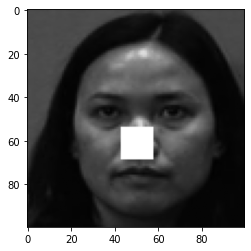

In [32]:
#voorbeeld tonen
img =  X_met_vierkant[2]

plt.imshow(img)




In [33]:
# Training set en test set 
#X_met_vierkant = np.asarray(X_met_vierkant)
#X_met_vierkant = X_met_vierkant /255

# omzeten van list naar array (met vierkant + zonder vierkant in 1 array)
#X_train_noise = np.vstack((np.asarray(X_met_vierkant),np.asarray(X_zonder_vierkant))) # -> vstack -> values

#X_test_noise = np.vstack((np.asarray(X_met_vierkant),np.asarray(X_zonder_vierkant))) # -> vstack -> values


X_train_noise = np.asarray(X_met_vierkant) # -> vstack -> values
X_test_noise = np.asarray(X_met_vierkant) # -> vstack -> values


X_train = np.asarray(X_zonder_vierkant)
X_test = np.asarray(X_zonder_vierkant)

# Image normalization when necessary
# Stap 3 : Randomize training set & test set 
#X_train_noise,X_train = shuffle(X_train_noise,X_train, random_state=0)
#X_test_noise, X_test = shuffle(X_test_noise,X_test, random_state=0)



print(X_train.shape)


(198, 100, 100, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


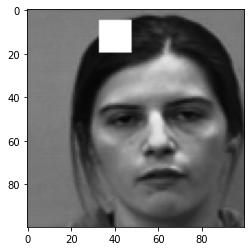

In [34]:
# show 
img =  X_test_noise[3]
#img = np.uint8(img)
plt.imshow(img)

In [35]:
#check of waarden tussen 0 en 1 liggen
print(X_train)

[[[[0.61882353 0.61882353 0.61882353]
   [0.63921569 0.63921569 0.63921569]
   [0.64117647 0.64117647 0.64117647]
   ...
   [0.61960784 0.61960784 0.61960784]
   [0.62470588 0.62470588 0.62470588]
   [0.6145098  0.6145098  0.6145098 ]]

  [[0.64745098 0.64745098 0.64745098]
   [0.66509804 0.66509804 0.66509804]
   [0.66666667 0.66666667 0.66666667]
   ...
   [0.64901961 0.64901961 0.64901961]
   [0.65411765 0.65411765 0.65411765]
   [0.64313725 0.64313725 0.64313725]]

  [[0.64941176 0.64941176 0.64941176]
   [0.6627451  0.6627451  0.6627451 ]
   [0.66078431 0.66078431 0.66078431]
   ...
   [0.65294118 0.65294118 0.65294118]
   [0.66196078 0.66196078 0.66196078]
   [0.64980392 0.64980392 0.64980392]]

  ...

  [[0.46392157 0.46392157 0.46392157]
   [0.47568627 0.47568627 0.47568627]
   [0.47058824 0.47058824 0.47058824]
   ...
   [0.4        0.4        0.4       ]
   [0.38980392 0.38980392 0.38980392]
   [0.38705882 0.38705882 0.38705882]]

  [[0.45568627 0.45568627 0.45568627]
   [0.4

In [36]:
# Image normalization when necessary
# Normalisatie
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train /= 255 #-> moet niet uitgevoerd worden, want de input is al tussen 0 -> 1  
#X_test /= 255


X_train_noise = X_train_noise.astype('float32')
X_test_noise = X_test_noise.astype('float32')

#X_train = np.clip(X_train, 0., 1.)
X_train_noise = np.clip(X_train_noise, 0., 1.) #fix noise error van imshow 255
X_test_noise = np.clip(X_test_noise, 0., 1.) #fix noise error van imshow 255


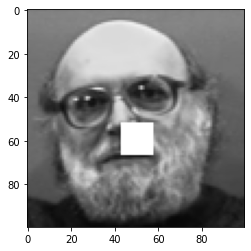

In [37]:
# show 
img =  X_train_noise[5]
#img = np.uint8(img)
plt.imshow(img)

## Denoising convolutional autoencoder


In [38]:
#Overcomplete: Encoder-> van gelijk naar gelijk       Decoder -> gelijk naar gelijk

# Functional model autoencoder
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model


# Model checkpoint
checkpoint_filepath = './Autoencoder_Undercomplete_Faces_bestModel'
mc = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_filepath,save_weights_only=True, monitor='val_loss',mode='auto',save_best_only=True)
# Early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 20)


#parameter
input_dim= X_train.shape[1]
epochs = 20
batchsize = 32
img_rows, img_cols = image_size, image_size
input_shape = (img_rows, img_cols,3) # 1 -> grijs waarden, 3 -> kleur

#model trainen

#Encoder
input_img = Input(shape=(image_size, image_size, 3))  ## 1 -> grijs waarden, 3 -> kleur

#dimensie gelijk aan image_size
#x = Flatten()(input_img)
x = Conv2D(100, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(100, (3, 3), activation='relu', padding='same')(x)
encoder = MaxPooling2D((2, 2), padding='same')(x)

# Decoder

x = Conv2D(100, (3, 3), activation='relu', padding='same')(encoder)
x = UpSampling2D((2, 2))(x)
x = Conv2D(100, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoder = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

Convolution_autoencoder = Model(input_img, decoder)
Convolution_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
#autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
Convolution_autoencoder.summary()


X_train_noise = np.reshape(X_train_noise, (len(X_train_noise), image_size, image_size, 3)) 
X_test_noise = np.reshape(X_test_noise, (len(X_test_noise), image_size, image_size, 3)) 
X_test = np.reshape(X_test, (len(X_test), image_size, image_size, 3)) 
X_train = np.reshape(X_train, (len(X_train), image_size, image_size, 3)) 


Convolution_autoencoder.fit(X_train_noise, X_train, epochs=epochs, batch_size=batchsize,shuffle=True )

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 100, 100, 100)     2800      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 100)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 50, 50, 100)       90100     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 25, 25, 100)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 25, 25, 100)       90100     
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 50, 50, 100)       0   

(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)


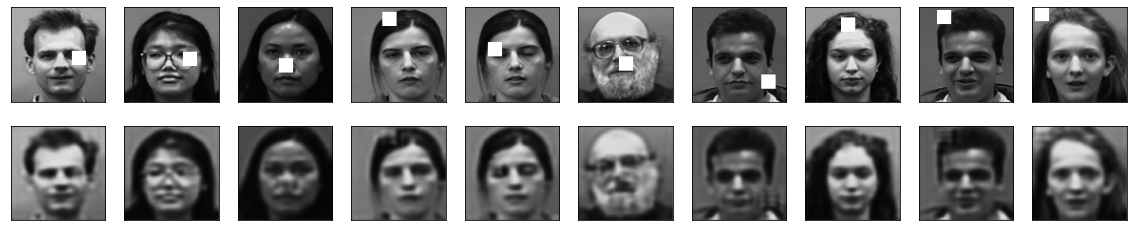

In [39]:
# Testing

decoded_imgs = Convolution_autoencoder.predict(X_test_noise)
print(X_test_noise.shape)
n = 10 # number of images to plot
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originals
    ax = plt.subplot(2, n, i + 1)
    print(X_test.shape)
    plt.imshow(X_test_noise[i].reshape(image_size, image_size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(image_size, image_size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## testen op een ongeziene gezicht

In [40]:
# Read the data
from PIL import Image


# Read and preprocess images

image_size = 100
nr_faces = 1000
X_ongeziene_faces_met_vierkant = []




# read train_images + vierkantje op afbeelding plaatsen 
path = './Ongeziene_Faces/'
valid_images = [".jpg",".gif",".png"]

for f in os.listdir(path)[:nr_faces]:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    im = imread(os.path.join(path,f))
    #im = cv2.imread(os.path.join(path,f),0) # convert to gray 
    im = transform.resize(im,(image_size,image_size),mode='constant',anti_aliasing=True)

    #Generate random coordinates
    x, y = np.random.randint(0,image_size-25, size=2)

    #vierkantje toevoegen op afbeelding
    data = np.array(im)
    data[x:x+15,y:y+15]=255
    
    #data = (data * 255).astype(np.uint8)#fixt de error van imshow
    X_ongeziene_faces_met_vierkant.append(data)






In [41]:
X_Ongeziene_faces_noise = np.asarray(X_ongeziene_faces_met_vierkant)

X_Ongeziene_faces_noise = X_Ongeziene_faces_noise.astype('float32')

#X_train = np.clip(X_train, 0., 1.)
X_Ongeziene_faces_noise = np.clip(X_Ongeziene_faces_noise, 0., 1.) #fix noise error van imshow 255


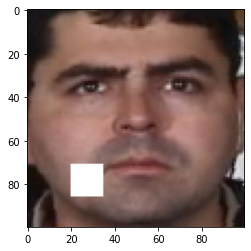

In [42]:
plt.imshow(X_Ongeziene_faces_noise[1])

(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)
(198, 100, 100, 3)


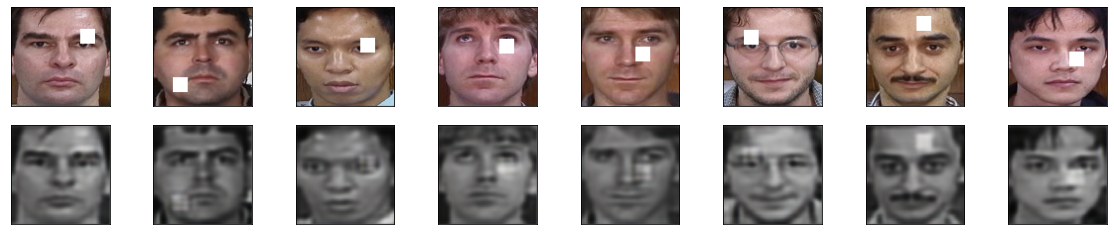

In [43]:
# Testing Undercomplete autoencoder

decoded_imgs = Convolution_autoencoder.predict(X_Ongeziene_faces_noise)
print(X_test_noise.shape)
n = 8 # number of images to plot
plt.figure(figsize=(20, 4))
for i in range(n):
    # Originals
    ax = plt.subplot(2, n, i + 1)
    print(X_test.shape)
    plt.imshow(X_Ongeziene_faces_noise[i].reshape(image_size, image_size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructions
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(image_size, image_size,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()